In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/pjol/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [7]:
path = "data/"

reduced=pd.read_csv(path+'Umap_reduced_data_3.csv')

In [33]:
def visualise_components(model_name, finaldim, C1, C2, single='False'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(f'Component {C1}', fontsize = 15)
    ax.set_ylabel(f'Component {C2}', fontsize = 15)
    colors = ['r', 'g', 'b','k','y']
    if single != 'False':
        targets = np.unique(finaldim['class'])[[single]]
        colors=colors[single]
        model_name+=' '+str(*targets)
    else:
        targets = np.unique(finaldim['class'])

    for target, color in zip(targets,colors):
        indicesToKeep = finaldim['class'] == target
        ax.scatter(finaldim.loc[indicesToKeep, f'component {C1}']
                , finaldim.loc[indicesToKeep, f'component {C2}']
                , c = color
                , s = 10
                , marker = '.',alpha=0.2)
    ax.legend(targets, fontsize=15)
    ax.set_title(f'2 component {model_name}', fontsize = 20)
    ax.grid()
    plt.savefig(f'plots/{model_name}_{C1}_{C2}.pdf')
    plt.show()

In [17]:
targets = np.unique(reduced['class'])[[0]]
targets

array(['GALAXY'], dtype=object)

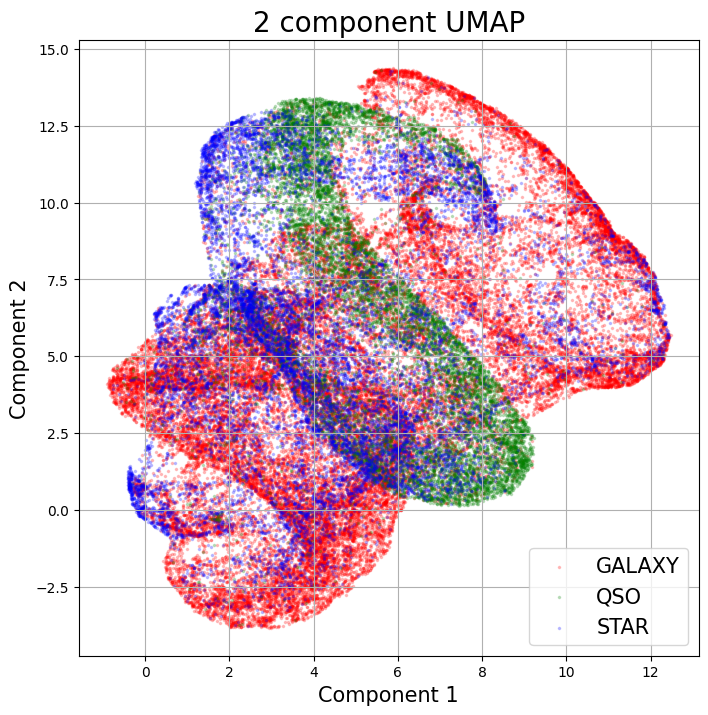

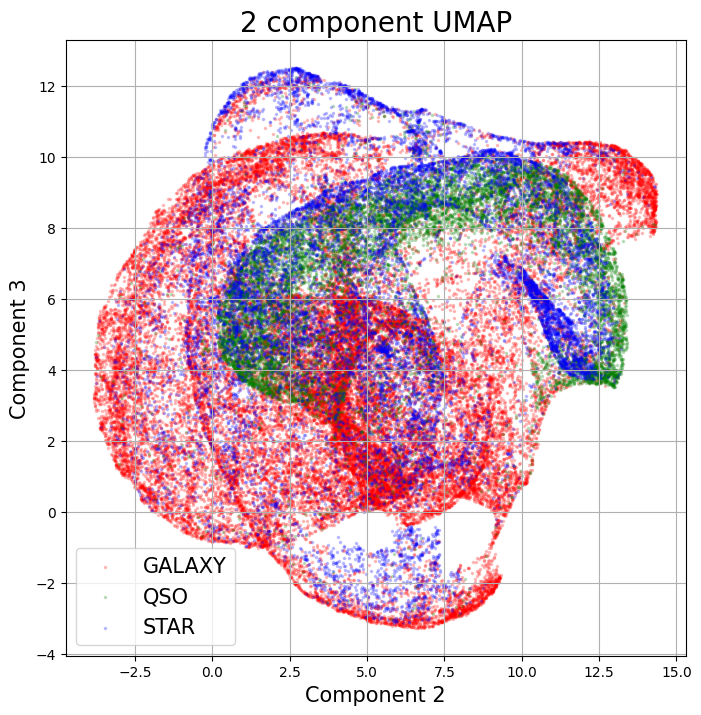

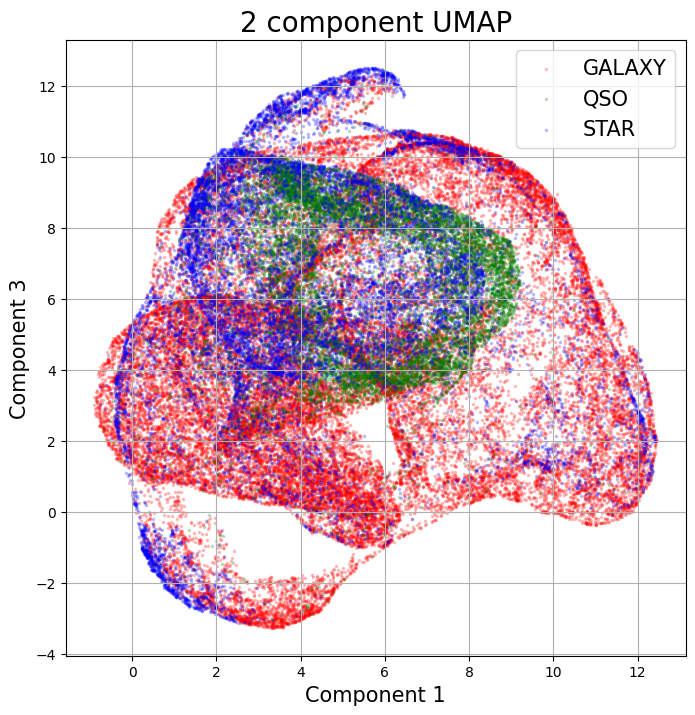

UMAP GALAXY


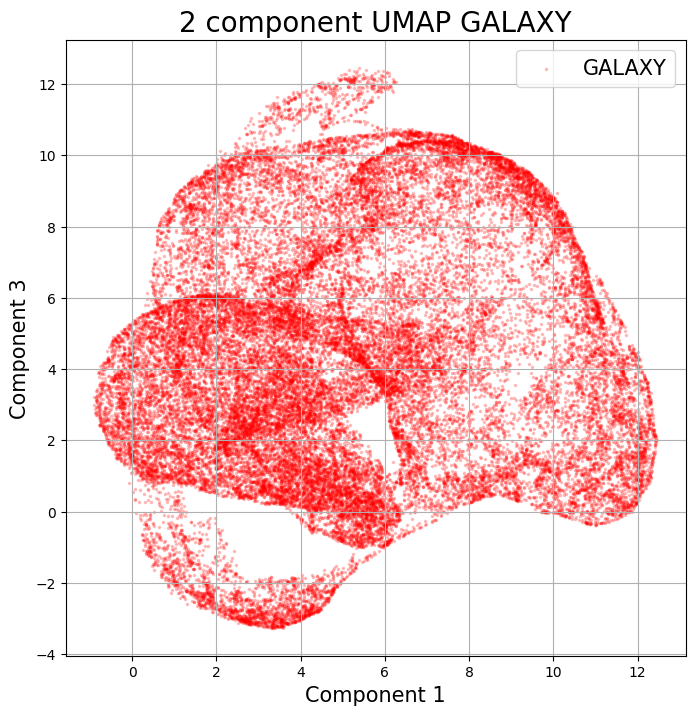

UMAP QSO


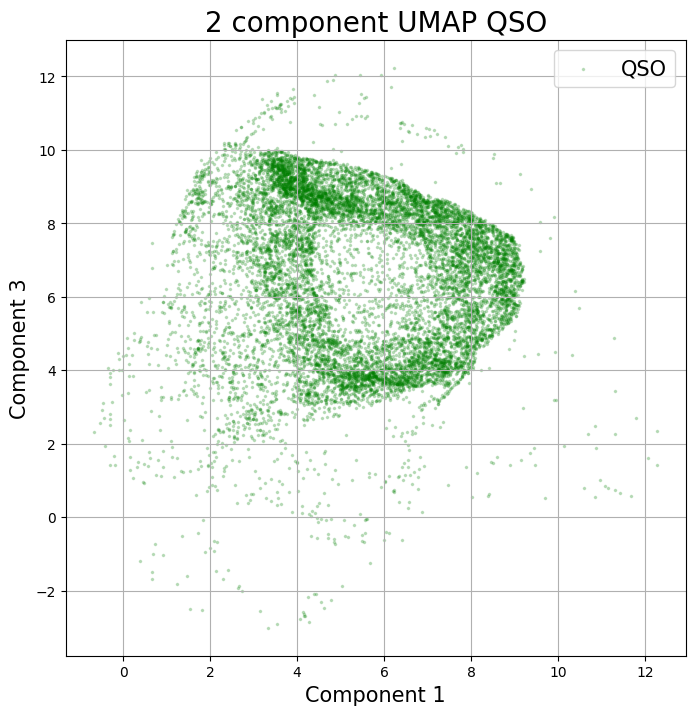

UMAP STAR


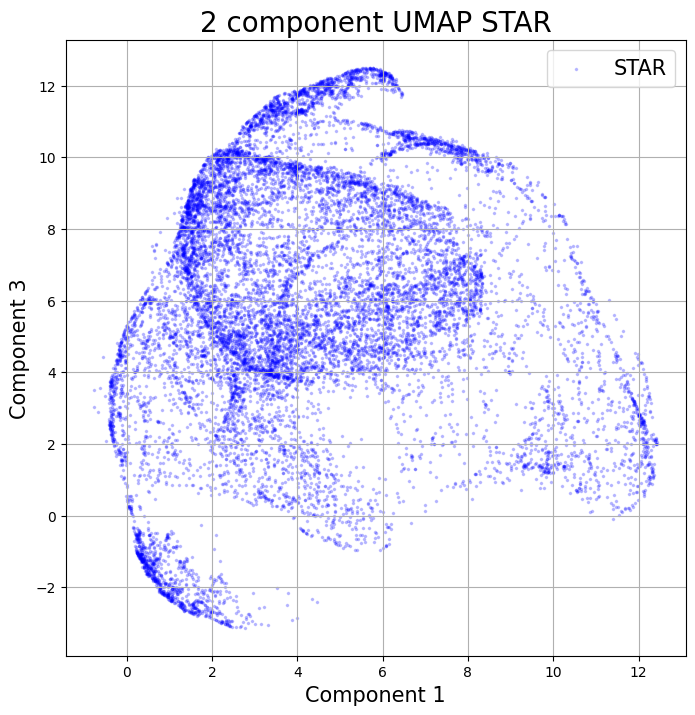

In [35]:
visualise_components('UMAP', reduced, '1', '2')
visualise_components('UMAP', reduced, '2', '3')
visualise_components('UMAP', reduced, '1', '3')
visualise_components('UMAP', reduced, '1', '3', single=0)
visualise_components('UMAP', reduced, '1', '3', single=1)
visualise_components('UMAP', reduced, '1', '3', single=2)


In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2).fit(X)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

x= UmapDf
X_std = StandardScaler().fit_transform(x)

clt = OPTICS()

model = clt.fit(X_std)

clusters = pd.DataFrame(model.fit_predict(X_std))
x["Cluster"] = clusters

fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(x['component 1'],x['component 2'], c=x["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()